In [3]:
import numpy as np
import matplotlib.pyplot as plt

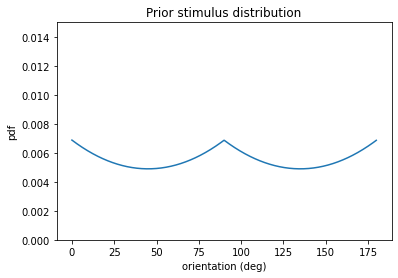

In [4]:
# "Natural prior" (Girshick et al. 2011, fig.6)
n_ori = 1000
a = 2e-4
b = 1

dori = 180 / n_ori
stim_dirs = np.float32(np.arange(0, 180, dori))
stim_p = np.zeros(n_ori)
midindx = np.argmin(np.abs(stim_dirs-90))

stim_p[:midindx] = a*(np.arange(0, stim_dirs[midindx], stim_dirs[midindx] / midindx)-45)**2 + b
stim_p[midindx:] = a*(np.arange(stim_dirs[midindx+1],
                               180, (180-stim_dirs[midindx+1]) / (n_ori-midindx)
                              )-135)**2 + b

plt.figure()
stim_p = stim_p/np.sum(stim_p)
plt.plot(stim_dirs,stim_p/dori)
plt.ylim([0,0.015])
plt.xlabel('orientation (deg)')
plt.ylabel('pdf')
plt.title('Prior stimulus distribution')

stim_cdf = np.cumsum(stim_p)



array([0.00123818, 0.00247351, 0.003706  , 0.00493567, 0.00616252,
       0.00738656, 0.00860781, 0.00982629, 0.01104199, 0.01225493,
       0.01346513, 0.01467259, 0.01587733, 0.01707936, 0.01827868,
       0.01947532, 0.02066927, 0.02186056, 0.0230492 , 0.02423519,
       0.02541854, 0.02659928, 0.02777741, 0.02895293, 0.03012588,
       0.03129624, 0.03246404, 0.03362929, 0.034792  , 0.03595218,
       0.03710984, 0.03826499, 0.03941765, 0.04056782, 0.04171552,
       0.04286076, 0.04400355, 0.0451439 , 0.04628183, 0.04741734,
       0.04855044, 0.04968115, 0.05080948, 0.05193544, 0.05305904,
       0.0541803 , 0.05529922, 0.05641581, 0.05753009, 0.05864208,
       0.05975177, 0.06085918, 0.06196432, 0.06306721, 0.06416786,
       0.06526627, 0.06636246, 0.06745644, 0.06854822, 0.06963782,
       0.07072524, 0.07181049, 0.0728936 , 0.07397456, 0.07505339,
       0.0761301 , 0.0772047 , 0.07827721, 0.07934764, 0.08041599,
       0.08148228, 0.08254652, 0.08360872, 0.0846689 , 0.08572

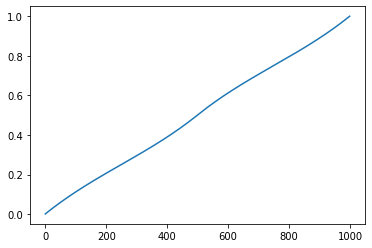

In [5]:
stim_cdf = np.cumsum(stim_p)
plt.figure()
plt.plot(stim_cdf)
stim_cdf

In [6]:
import tensorflow as tf

In [47]:
logits = tf.convert_to_tensor(np.linspace(-np.pi, np.pi,30),dtype=tf.float32)
laplac = np.zeros(logits.shape[0])
laplac[0] = -0.25
laplac[1] = 0.5
laplac[2] = -0.25
spectrum = tf.signal.fft(tf.cast(laplac, tf.complex64))
laplac = tf.linalg.LinearOperatorCirculant(spectrum,input_output_dtype=tf.float32)

In [69]:
out

<tf.Tensor: shape=(), dtype=float32, numpy=42.4264>

In [75]:
a = tf.Variable(np.arange(0, 120, dtype=np.float32).reshape([2,30,2]), dtype=tf.float32)
with tf.GradientTape() as t:
    out = tf.square(tf.norm(laplac.matmul(a),ord='euclidean'))
#print(a)
print(out)
vars_and_grads = t.gradient(out, a) 
vars_and_grads

tf.Tensor(1799.9994, shape=(), dtype=float32)


<tf.Tensor: shape=(2, 30, 2), dtype=float32, numpy=
array([[[-2.24999485e+01, -2.24999523e+01],
        [ 7.49999332e+00,  7.49999237e+00],
        [-1.88312151e-05, -1.36477129e-05],
        [ 9.17912712e-06,  6.58673662e-06],
        [-7.81918970e-06, -9.77841592e-06],
        [ 1.28547235e-05,  2.16009867e-05],
        [-1.00865400e-05, -2.06389795e-05],
        [ 9.74596060e-06,  1.43080069e-05],
        [ 1.30741012e-06,  3.67345501e-06],
        [-8.79160962e-06, -1.40717666e-05],
        [ 1.39879476e-05,  1.95160465e-05],
        [-7.03553633e-06, -1.27659778e-05],
        [ 1.52159182e-05,  1.95324283e-05],
        [-3.13208438e-05, -3.15932957e-05],
        [ 2.45618485e-05,  2.56081730e-05],
        [-2.03549880e-05, -2.14725751e-05],
        [ 1.04448745e-05,  1.07069982e-05],
        [-1.25015358e-05, -1.19150745e-05],
        [ 1.18065645e-05,  1.16679130e-05],
        [-2.91717879e-06, -4.24942391e-06],
        [ 8.81273152e-08,  3.25479573e-06],
        [-9.38984977e-06

In [11]:
# check 

TypeError: conv1d_v2() missing 2 required positional arguments: 'stride' and 'padding'